In [1]:
import tensorflow as tf
from glob import glob  
import os
from tensorflow.keras import models
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Activation
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing import image

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
name_dict = {}
name_id = 0
dirname = "./data/train"
filenames = os.listdir(dirname)
train_img = []
train_label = []
for filename in filenames:
    full_filename = os.path.join(dirname, filename)
    if filename not in name_dict:
        name_dict[filename] = name_id
        name_id += 1
    print(os.path.join(full_filename, "*"))
    img_list = glob(os.path.join(full_filename, "*"))
    print(len(img_list))
    for img in img_list:
        train_img.append(img)
        train_label.append(name_dict[filename])
    print (full_filename)

./data/train\hotsix\*
1638
./data/train\hotsix
./data/train\hotsixking\*
1634
./data/train\hotsixking
./data/train\HSChickenRamen\*
1647
./data/train\HSChickenRamen
./data/train\jinhot\*
1654
./data/train\jinhot
./data/train\milkis\*
1648
./data/train\milkis
./data/train\pepper\*
1649
./data/train\pepper
./data/train\pepsi\*
1653
./data/train\pepsi
./data/train\sprite\*
1662
./data/train\sprite
./data/train\tgimbab\*
1639
./data/train\tgimbab


In [4]:
train_datagen = image.ImageDataGenerator(preprocessing_function= preprocess_input)

In [5]:
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (299, 299),
                                                 batch_size = 10,
                                                class_mode="categorical"
                                                )

Found 14824 images belonging to 9 classes.


In [6]:
training_set.class_indices

{'HSChickenRamen': 0,
 'hotsix': 1,
 'hotsixking': 2,
 'jinhot': 3,
 'milkis': 4,
 'pepper': 5,
 'pepsi': 6,
 'sprite': 7,
 'tgimbab': 8}

In [7]:
base_model = InceptionV3(weights='imagenet')
x = base_model.layers[-2].output
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
predict = Dense(len(training_set.class_indices), activation='softmax')(x)
model = Model(inputs = base_model.input, outputs = predict)

In [8]:
#for layer in base_model.layers:
# layer.trainable = False

In [19]:
#model.summary()

In [10]:
model.compile(optimizer='Rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [11]:
training_set.batch_size

10

In [12]:
history = model.fit_generator(training_set, steps_per_epoch=training_set.n//training_set.batch_size, epochs=10 )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1482 steps
Epoch 1/10
1482/1482 [==============================] - 444s 300ms/step - loss: 0.7375 - acc: 0.7806
Epoch 2/10
1482/1482 [==============================] - 431s 291ms/step - loss: 0.1831 - acc: 0.9606
Epoch 3/10
1482/1482 [==============================] - 432s 291ms/step - loss: 0.1048 - acc: 0.9759
Epoch 4/10
1482/1482 [==============================] - 431s 291ms/step - loss: 0.0768 - acc: 0.9843
Epoch 5/10
1482/1482 [==============================] - 430s 290ms/step - loss: 0.0738 - acc: 0.9868
Epoch 6/10
1482/1482 [==============================] - 437s 295ms/step - loss: 0.0529 - acc: 0.9894
Epoch 7/10
1482/1482 [==============================] - 432s 292ms/step - loss: 0.0423 - acc: 0.9926
Epoch 8/10
1482/1482 [==============================] - 432s 291ms/step - loss: 0.0343 - acc: 0.9933
Epoch 9/10
1482/1482 [==============================] - 431s 291ms/ste

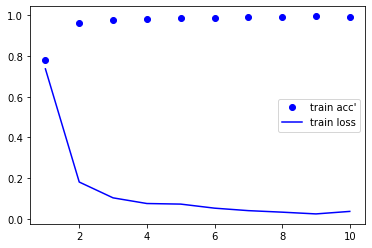

In [15]:
epochs = range(1,10+1)
plt.plot(epochs, history.history['acc'], 'bo', label="train acc'")
plt.plot(epochs, history.history['loss'], 'b', label="train loss")
plt.legend()
plt.show()

In [16]:
idx_label = {}
for key in training_set.class_indices:
    idx_label[training_set.class_indices[key] ] = key 

In [17]:
name_dict = {}
name_id = 0
dirname = "./data/predict"
text_img = []
img_list = glob(os.path.join(dirname, "*"))
for img in img_list:
    text_img.append(img)
print(text_img)
HEIGHT = 299
WIDTH  = 299

['./data/predict\\20200413_101015_093.jpg', './data/predict\\20200413_111610.jpg', './data/predict\\20200413_113438.jpg', './data/predict\\20200413_113446.jpg', './data/predict\\20200413_140155.jpg', './data/predict\\20200413_142505.jpg', './data/predict\\20200413_142524.jpg', './data/predict\\20200414_002402.jpg', './data/predict\\20200414_002417.jpg', './data/predict\\20200414_002434.jpg', './data/predict\\20200414_113816.jpg']


./data/predict\20200413_101015_093.jpg
[1.2177587e-26 1.8327059e-14 1.0000000e+00 8.3584225e-12 7.6623404e-12
 6.6848844e-15 4.5896848e-30 1.2998555e-22 1.5840968e-15]


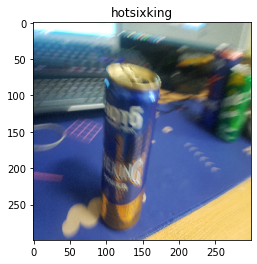

./data/predict\20200413_111610.jpg
[6.2888097e-15 5.1466885e-26 1.8873448e-28 3.6201530e-26 5.5851482e-13
 1.0000000e+00 4.1143307e-19 5.5960641e-14 4.2133807e-14]


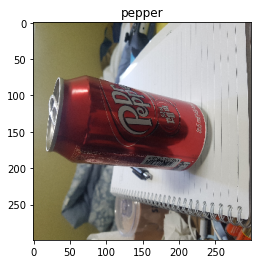

./data/predict\20200413_113438.jpg
[1.4277859e-07 3.8722581e-26 5.9001072e-23 4.8548462e-25 9.9999976e-01
 3.1894168e-10 5.4631738e-12 7.7093771e-09 8.6338673e-08]


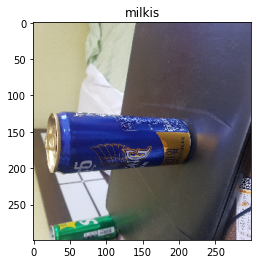

./data/predict\20200413_113446.jpg
[5.4688828e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2838422e-33
 3.8558603e-30 2.1350173e-18 1.0000000e+00 1.1990916e-30]


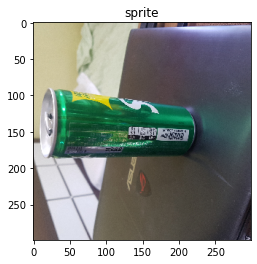

./data/predict\20200413_140155.jpg
[1.1445789e-05 1.8242284e-08 8.3897485e-28 9.8445650e-34 8.2801762e-07
 4.2207029e-15 9.9998772e-01 5.3592424e-26 5.3388527e-13]


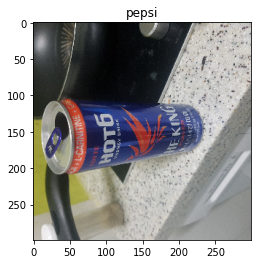

./data/predict\20200413_142505.jpg
[1.175900e-10 4.384783e-37 0.000000e+00 0.000000e+00 6.968949e-02
 4.511723e-20 7.238428e-20 3.098608e-15 9.303105e-01]


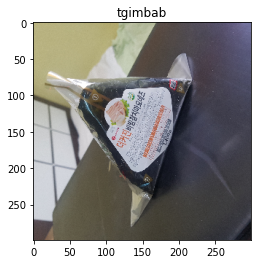

./data/predict\20200413_142524.jpg
[8.76851090e-08 8.43958501e-25 3.66803872e-20 9.99999881e-01
 6.37742970e-09 1.01073466e-22 3.74980049e-19 1.76198432e-22
 1.46883234e-23]


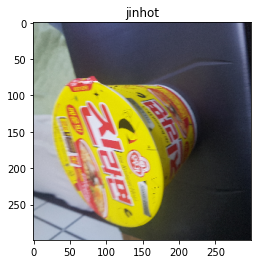

./data/predict\20200414_002402.jpg
[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4851892e-19
 0.0000000e+00 2.8381786e-24 8.5149709e-24 6.7255145e-19]


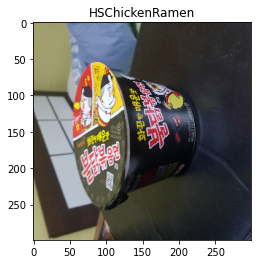

./data/predict\20200414_002417.jpg
[2.3632342e-15 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 3.6360591e-24 4.7452400e-19 1.8006194e-23 1.3543003e-20]


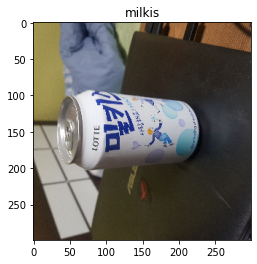

./data/predict\20200414_002434.jpg
[2.9870479e-12 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3791741e-20
 1.9512873e-19 1.0000000e+00 4.6757553e-19 2.3072404e-37]


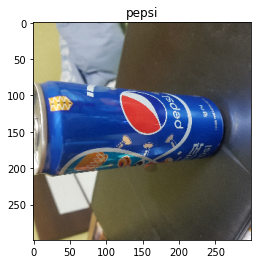

./data/predict\20200414_113816.jpg
[6.3815388e-14 3.2007925e-08 8.8836492e-21 1.2505420e-27 1.5877245e-10
 2.1094696e-16 1.0000000e+00 4.0664028e-24 3.0444628e-20]


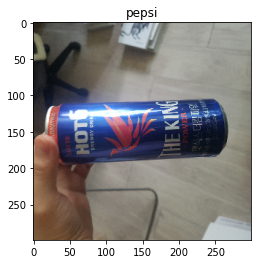

In [18]:
for img_path in text_img:
    img = image.load_img(img_path, target_size=(HEIGHT, WIDTH))
    x = image.img_to_array(img)
    # Expand to 2D array
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #print(x.shape)
    #idx_label[np.argmax( model.predict(x))]
    print(img_path)
    result = model.predict(x)[0]
    print(result)
    plt.title(idx_label[np.argmax( result)] )
    plt.imshow(img)
    plt.show()